## 1. Clean the dataset

In [2]:
import pandas as pd

df = pd.read_csv("./auto-mpg/auto-mpg.csv")

df_clean = df.dropna()

df_clean.to_csv("./auto-mpg/auto-mpg-clean.csv")

## 2. Question 1
#### I chose to calculate quartiles to asign bins to mpg values.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./auto-mpg/auto-mpg-clean.csv")

mpg = df['mpg'].values

print(f"mpg values: {mpg[:10]}")

lower = np.amin(mpg)
q1 = np.percentile(mpg, 25)
q2 = np.percentile(mpg, 50)
q3 = np.percentile(mpg, 75)
upper = np.amax(mpg)

print("\nMpg category threshold:")
print(f"Low mpg: mpg <= {q1:.2f}")
print(f"Medium mpg: {q1:.2f} < mpg <= {q2:.2f}")
print(f"High mpg: {q2:.2f} < mpg <= {q3:.2f}")
print(f"Very High mpg: mpg > {q3:.2f} ")

mpg values: [18. 15. 18. 16. 17. 15. 14. 14. 14. 15.]

Mpg category threshold:
Low mpg: mpg <= 17.00
Medium mpg: 17.00 < mpg <= 22.75
High mpg: 22.75 < mpg <= 29.00
Very High mpg: mpg > 29.00 


## 3. Question 2
####  I'll use a simple separation metric: calculate the variance of category means to analyze which pair is most imformative.

Number of features for scatterplot matrix: 7
Features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']



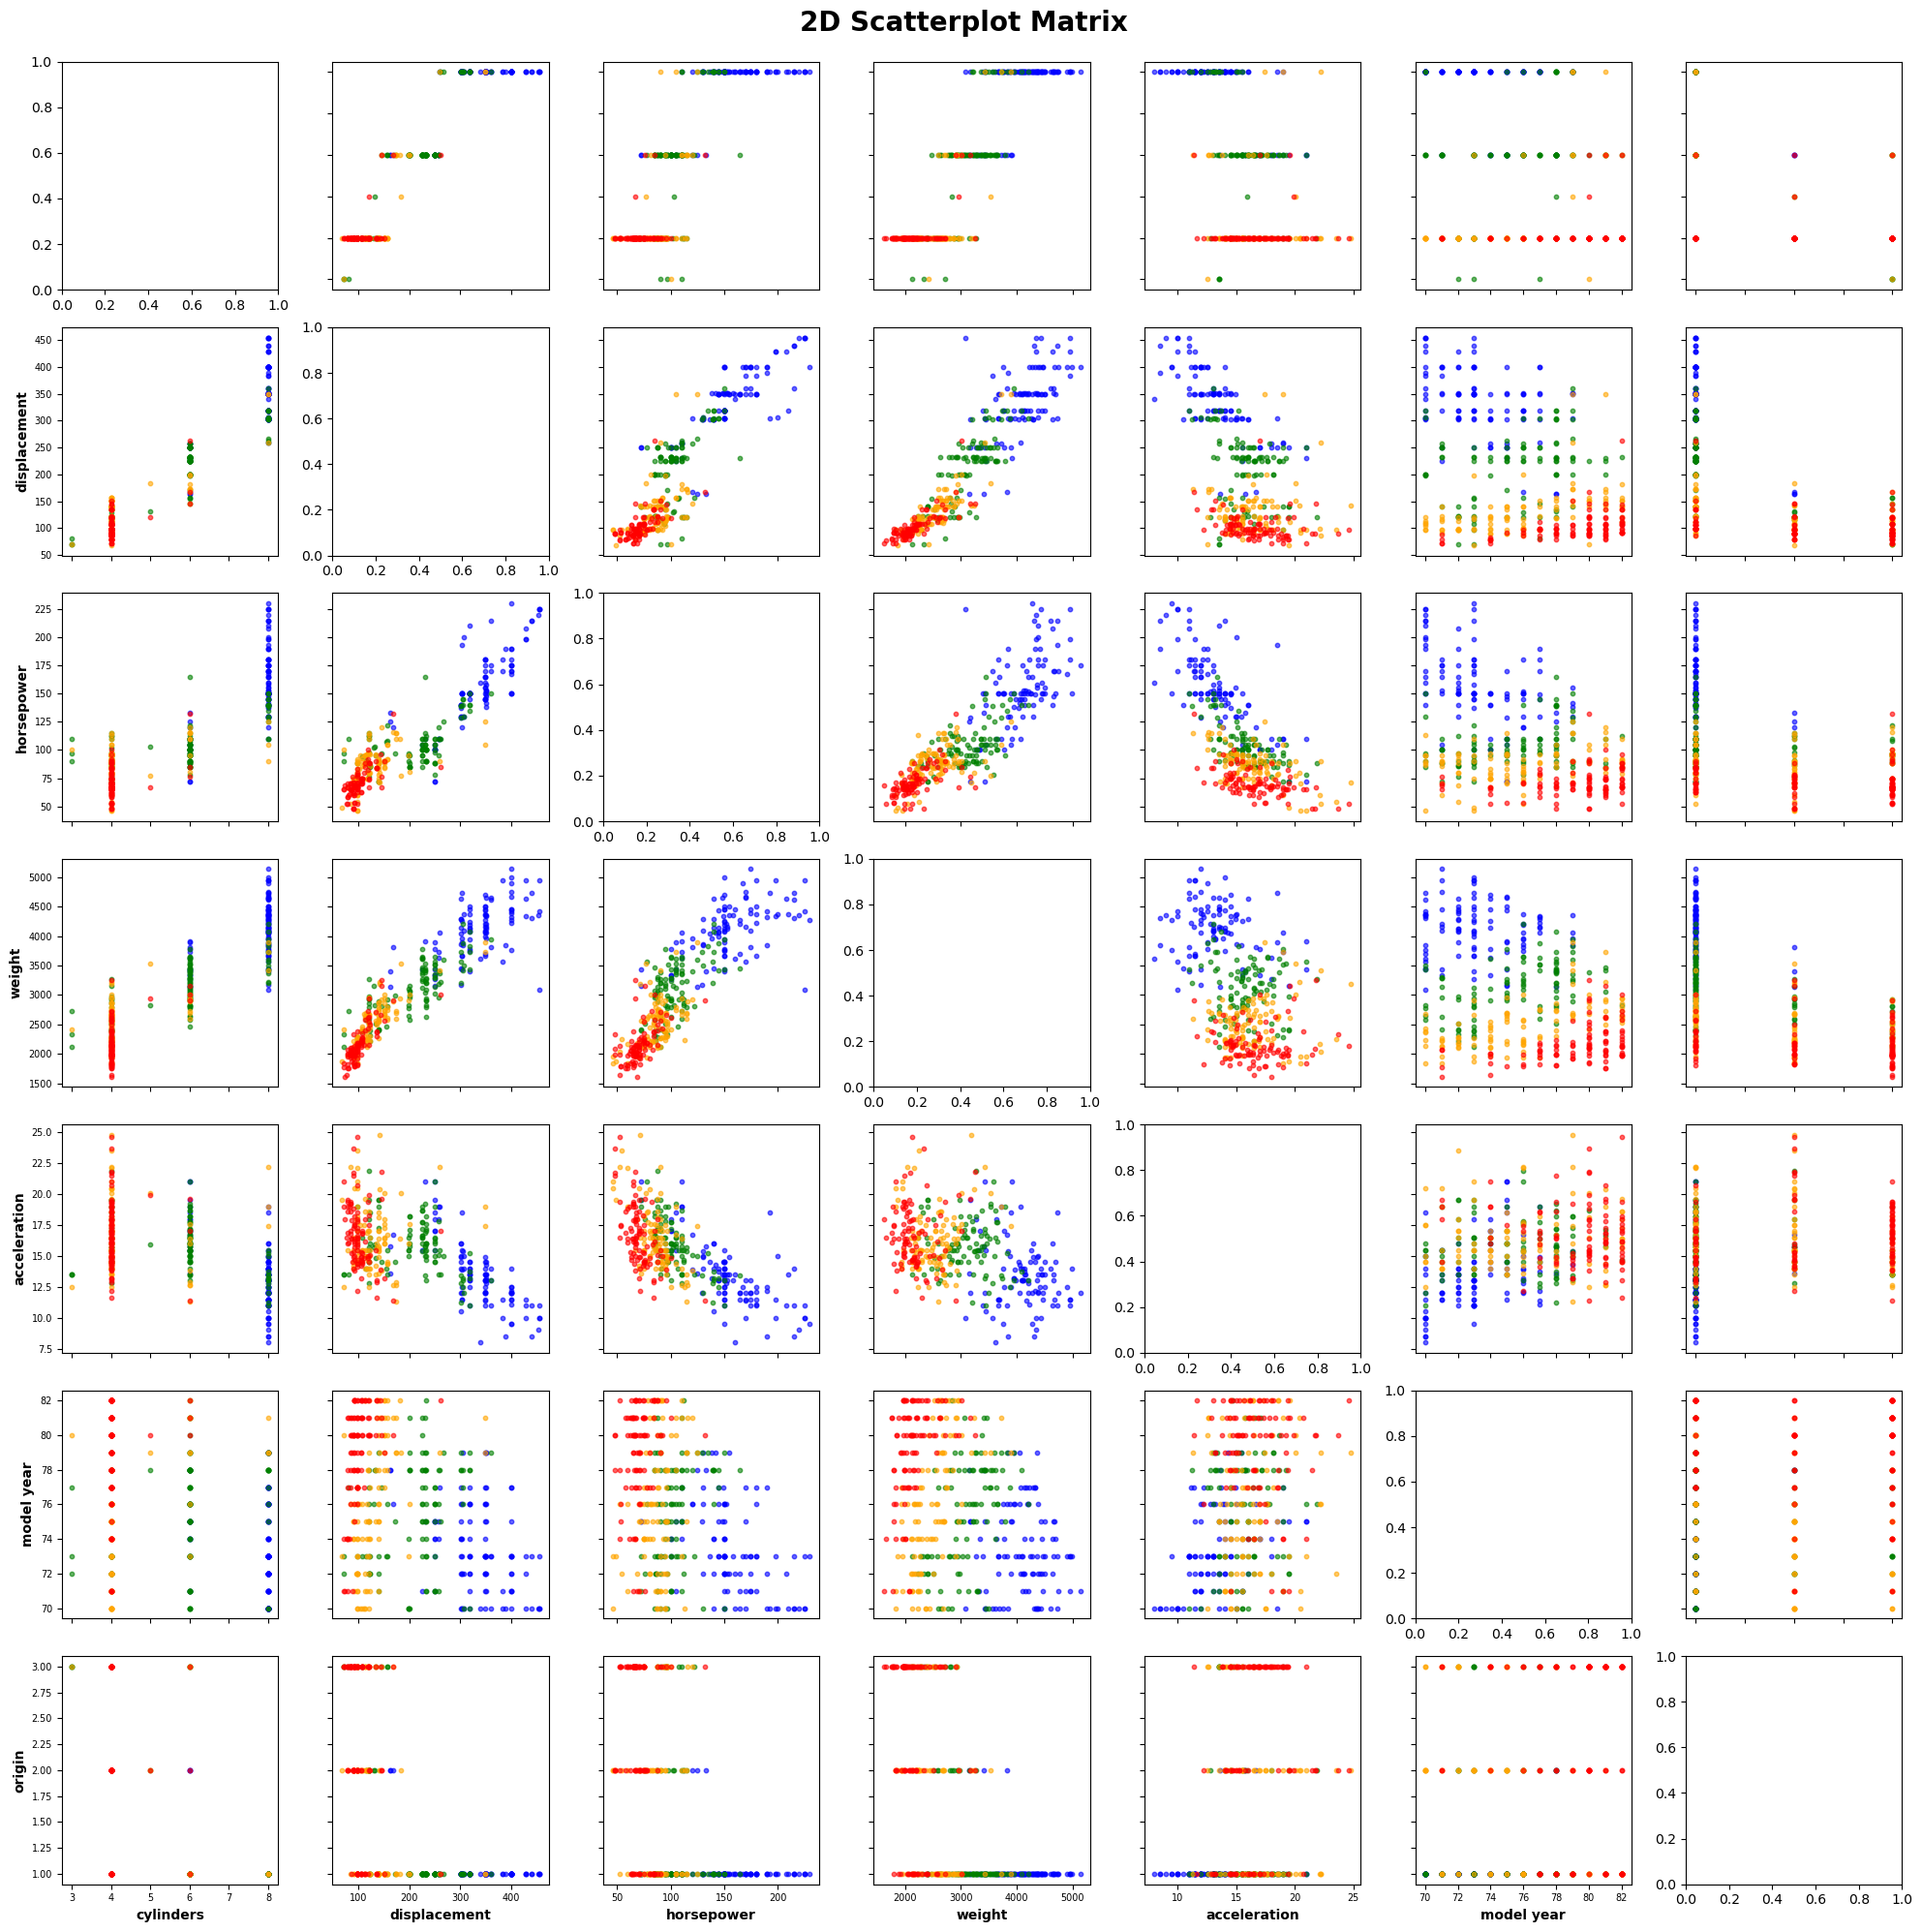

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

def categorize_mpg(mpg):
    if mpg <= q1:
        return 0
    elif mpg <= q2:
        return 1
    elif mpg <= q3:
        return 2
    else:
        return 3

df['mpg_category'] = df['mpg'].apply(categorize_mpg)

category_names = ['Low', 'Medium', 'High', 'Very High']
colors = ['blue', 'green', 'orange', 'red']

features = ['cylinders', 'displacement', 'horsepower', 'weight', 
            'acceleration', 'model year', 'origin']

print(f"Number of features for scatterplot matrix: {len(features)}")
print(f"Features: {features}\n")

n_features = len(features)
fig, axes = plt.subplots(n_features, n_features, figsize=(20, 20))
fig.suptitle('2D Scatterplot Matrix', fontsize=20, fontweight='bold', y=0.995)

for i in range(n_features):
    for j in range(n_features):
        ax = axes[i, j]
        
        if i == j:  
            continue
        else:
            for cat in range(4):
                cat_data = df[df['mpg_category'] == cat]
                ax.scatter(cat_data[features[j]], cat_data[features[i]], 
                          c=colors[cat], s=10, alpha=0.6, label=category_names[cat])
        
        if i == n_features - 1:
            ax.set_xlabel(features[j], fontsize=10, fontweight='bold')
        else:
            ax.set_xticklabels([])
            
        if j == 0:
            ax.set_ylabel(features[i], fontsize=10, fontweight='bold')
        else:
            ax.set_yticklabels([])
        
        ax.tick_params(labelsize=7)

plt.tight_layout()
plt.savefig('./plots/scatterplot_matrix.png', dpi=150, bbox_inches='tight')
plt.show()


Top 10 Most Informative Feature Pairs:
Rank  Feature 1           Feature 2           Separability Score  
------------------------------------------------------------------
1     cylinders           weight              0.820020            
2     weight              origin              0.820019            
3     weight              acceleration        0.819994            
4     weight              model year          0.819982            
5     displacement        weight              0.819425            
6     horsepower          weight              0.819321            
7     cylinders           displacement        0.781493            
8     displacement        origin              0.781410            
9     displacement        acceleration        0.779918            
10    displacement        model year          0.779179            

MOST INFORMATIVE PAIR: cylinders vs weight


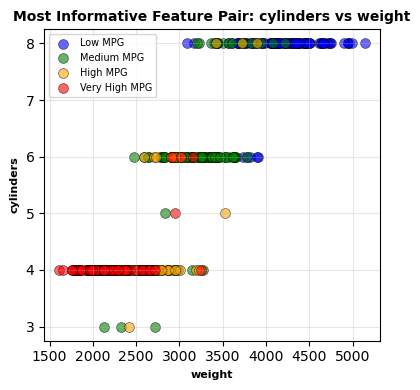

In [18]:
# Now analyze

def calculate_separability(feature1, feature2, df):
    centroids = []
    within_var = 0
    
    for cat in range(4):
        cat_data = df[df['mpg_category'] == cat]
        centroid = [cat_data[feature1].mean(), cat_data[feature2].mean()]
        centroids.append(centroid)
        
        within_var += cat_data[feature1].var() + cat_data[feature2].var()
    
    centroids = np.array(centroids)
    between_var = np.var(centroids[:, 0]) + np.var(centroids[:, 1])
    
    return between_var / within_var

separability_scores = []

for i, j in combinations(range(len(features)), 2):
    score = calculate_separability(features[i], features[j], df)
    separability_scores.append((features[i], features[j], score))

separability_scores.sort(key=lambda x: x[2], reverse=True)

print("\nTop 10 Most Informative Feature Pairs:")
print(f"{'Rank':<6}{'Feature 1':<20}{'Feature 2':<20}{'Separability Score':<20}")
print("-" * 66)

for rank, (f1, f2, score) in enumerate(separability_scores[:10], 1):
    print(f"{rank:<6}{f1:<20}{f2:<20}{score:<20.6f}")

print("\n" + "="*70)
print(f"MOST INFORMATIVE PAIR: {separability_scores[0][0]} vs {separability_scores[0][1]}")
print("="*70)

fig, ax = plt.subplots(figsize=(4, 4))

best_f1, best_f2, _ = separability_scores[0]

for cat in range(4):
    cat_data = df[df['mpg_category'] == cat]
    ax.scatter(cat_data[best_f2], cat_data[best_f1], 
              c=colors[cat], s=50, alpha=0.6, 
              label=f'{category_names[cat]} MPG', edgecolors='black', linewidth=0.5)

ax.set_xlabel(best_f2, fontsize=8, fontweight='bold')
ax.set_ylabel(best_f1, fontsize=8, fontweight='bold')
ax.set_title(f'Most Informative Feature Pair: {best_f1} vs {best_f2}', 
            fontsize=10, fontweight='bold')
ax.legend(fontsize=7)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./plots/most_informative_pair.png', dpi=150, bbox_inches='tight')
plt.show()